# **Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework. (Portafolio Implementación)**

**Amy Murakami Tsutsumi - A01750185**

Para este portafolio se analizarán los datos del clima en Szeged, Hungría del año 2006-2016. Este dataset se obtuvo de la siguiente liga: https://www.kaggle.com/datasets/budincsevity/szeged-weather

Únicamente se utilizarán los primeros 100 datos de las columnas de temperatura y humedad. De esta manera se podrá predecir si existe una relación entre estos valores y si se puede predecir la humedad al tener el dato de la temperatura. 

### **Lectura de datos**


In [208]:
"""
from google.colab import drive
drive.mount("/content/gdrive") 
%cd "/content/gdrive/MyDrive/Séptimo Semestre/Mod2"
"""

'\nfrom google.colab import drive\ndrive.mount("/content/gdrive") \n%cd "/content/gdrive/MyDrive/Séptimo Semestre/Mod2"\n'

Para la implementación del modelo de regresión lineal no se utilizará ninguna librería. Sin embargo, será necesario el uso de librerías para poder graficar y para realizar el subset de entrenamiento. Por lo tanto, las librerías que se utilizarán para estos procesos son:
* *pandas* : Para la creación y operaciones de dataframes.
* *matplotlib.pyplot* : Para la generación de gráficos.
* *numpy* : Para la creación de vectores y matrices.
* *sklearn.model_selection - train_test_split* : Para la división de los datos en subconjuntos de entrenamiento y prueba.




In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

### **Entendimiento de los datos**

In [193]:
df = pd.read_csv('weatherHist.csv') #Leer el dataset
df.head()

,Temperature (C),Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


En la tabla anterior se muestran las columnas en el dataset que son la de temperatura en grados centígrados y humedad que es un valor entre 0 y 1. Ambos valores son de tipo float.
Ahora se realizará un plot para poder visualizar gráficamente de qué manera se comportan las variables. 

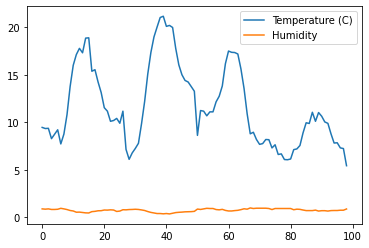

In [194]:
df.plot()

In [195]:
temp = df['Temperature (C)'] #Variable de temperatura 
humidity = df['Humidity'] #Variable de humedad
temp.head()

0    9.472222
1    9.355556
2    9.377778
3    8.288889
4    8.755556
Name: Temperature (C), dtype: float64

Se realizará una matriz de correlación para determinar la relación entre ambas variables. 

In [196]:
# Matriz de Correlación
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Temperature (C),Humidity
Temperature (C),1.000000,-0.825571
Humidity,-0.825571,1.000000


Como podemos observar, la correlación entre temperatura y humedad es muy elevada. 

### **Modularización del data-set**

Ahora se realizará la división de datos en subsets de entrenamiento y prueba. 

In [197]:
#Modularización del data-set
x_train, x_test, y_train, y_test = train_test_split(temp, humidity, test_size = 0.20, train_size = 0.80, random_state= 2)

### **Modelo de predicción**

Para realizar las predicciones se utilizará el modelo de regresión lineal. Por lo tanto, se utilizarán las siguientes fórmulas: 

$θ_0 = θ_0 - α \frac{1}{n} 
\sum_{i=1}^{n}(h_{0}(x_{i})+y_{i}) 
 $

$θ_1 = θ_1 - α \frac{1}{n} 
\sum_{i=1}^{n}(h_{0}(x_{i})+y_{i})x_i 
 $

In [198]:
def h(temp,theta):
  # Calcular la función de hipótesis
  return theta[0] + theta[1]*temp

def regLin(temp, humidity, alpha, iter):
  # Calcular la regresión lineal
  theta = [1,1] # Valores de theta_i del modelo [theta_0, theta_1]
  n =len(temp) # Número de datos

  print("Theta inicial: ", theta)

  for idx in range(iter):
    # Listas para almacenar los valores de h, theta 0 y theta 1
    allh = []
    delta = []
    deltaX =[]

    for x_i,y_i in zip(temp,humidity):
      # Almacenar valores calculados de h, theta 0 y theta 1 de cada iteración
      allh.append(h(x_i,theta))
      delta.append(h(x_i,theta)-y_i)
      deltaX.append((h(x_i,theta)-y_i)*x_i)

    # Cálculo final del theta 0 y theta 1
    theta[0] = theta[0] - alpha/n*sum(delta) #Cálculo de theta 0
    theta[1] = theta[1] - alpha/n*sum(deltaX) #Cálculo de theta 1

  print("Theta final: ", theta)

  # Graficar la regresión lineal
  plt.title("Regresión lineal del clima en Szeged (2006-2016)", fontsize=16)
  plt.scatter(temp, humidity, marker='.', color="yellowgreen")
  #plt.plot(temp, theta0 + theta1*temp, color="mediumturquoise")
  plt.plot(temp, theta[0] + theta[1]*temp, color="mediumturquoise")
  plt.xlabel("Temperatura")
  plt.ylabel("Humedad")
  plt.show()

  return allh

In [199]:
def metricaDesemp (pred):
  # Obtener la métrica de desempeño de los modelos
  correlation_matrix = np.corrcoef(y_train, pred)
  correlation = correlation_matrix[0,1]
  r_squared = correlation**2
  return r_squared

### **Pruebas con diferentes parámetros**

Se realizarán 5 pruebas con diferentes parámetros con los datos de entrenamiento para poder elegir el modelo con mejor desempeño. 

Theta inicial:  [1, 1]
Theta final:  [1.134930801501417, -0.03278603245817401]


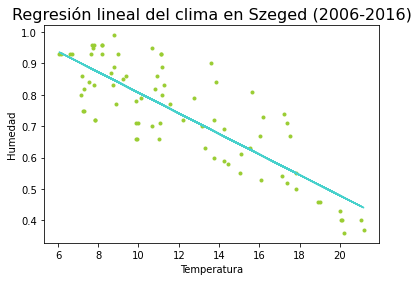

Métrica de desempeño de la prueba 1:  0.6936664029435702


In [200]:
predic = []
pred1 = regLin(x_train, y_train, 0.0005, 100000) 
met1 = metricaDesemp(pred1)
predic.append(met1)
print("Métrica de desempeño de la prueba 1: ", met1)

Theta inicial:  [1, 1]
Theta final:  [0.9464259897430221, -0.018853381066785444]


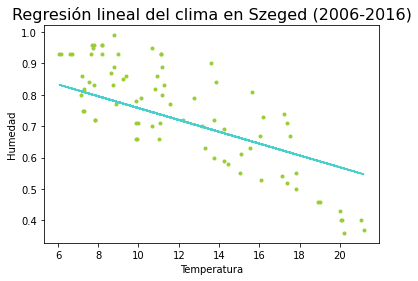

Métrica de desempeño de la prueba 2:  0.6936664029435704


In [201]:
pred2 = regLin(x_train, y_train, 0.00001, 100000) 
met2 = metricaDesemp(pred2)
predic.append(met2)
print("Métrica de desempeño de la prueba 2: ", met2)

Theta inicial:  [1, 1]
Theta final:  [1.0642278476712483, -0.0275602793388332]


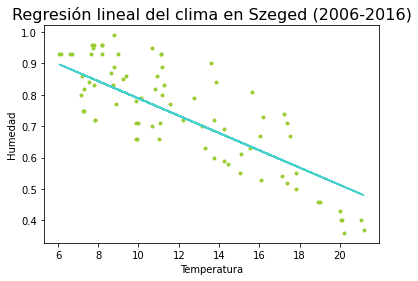

Métrica de desempeño de la prueba 3:  0.6936664029435707


In [202]:
pred3 = regLin(x_train, y_train, 0.001, 10000) 
met3 = metricaDesemp(pred3)
predic.append(met3)
print("Métrica de desempeño de la prueba 3: ", met3)

Theta inicial:  [1, 1]
Theta final:  [1.1250707993649236, -0.03205726606115396]


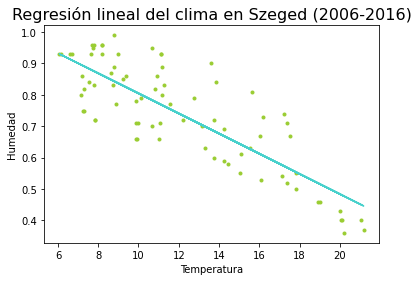

Métrica de desempeño de la prueba 4:  0.6936664029435705


In [203]:
pred4 = regLin(x_train, y_train, 0.005, 5500) 
met4 = metricaDesemp(pred4)
predic.append(met4)
print("Métrica de desempeño de la prueba 4: ", met4)

Theta inicial:  [1, 1]
Theta final:  [1.1358826780390563, -0.03285638696977962]


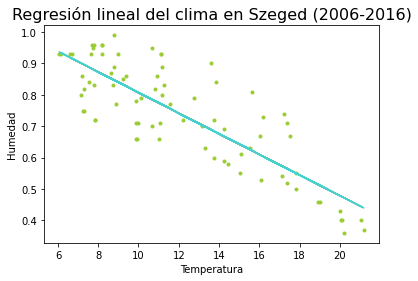

Métrica de desempeño de la prueba 5:  0.6936664029435705


In [204]:
pred5 = regLin(x_train, y_train, 0.0015, 100000) 
met5 = metricaDesemp(pred5)
predic.append(met5)
print("Métrica de desempeño de la prueba 5: ", met5)

Ahora se comparará el desempeño de las cinco pruebas para poder elegir los parámetros que se utilizarán para realizar las predicciones.

In [205]:
print(predic)
print(max(predic))

[0.6936664029435702, 0.6936664029435704, 0.6936664029435707, 0.6936664029435705, 0.6936664029435705]
0.6936664029435707


Como se puede observar los parámetros de la tercera prueba son los indicados con un alpha de 0.001 y 10000 iteraciones.

### **Predicción**

Theta inicial:  [1, 1]
Theta final:  [0.9970759382989637, -0.02369674445443631]


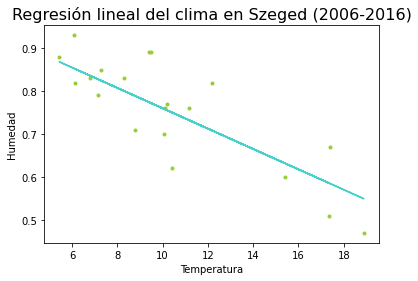

In [206]:
predF = regLin(x_test, y_test, 0.001, 10000) 

La siguiente tabla muestra los valores de entrada, el valor real esperado y los resultados de la predicción utilizando un alpha de 0.001 y 10000 iteraciones.

In [207]:
pd.set_option('max_columns', None)
dfEntPred = pd.DataFrame()
dfEntPred["Entrada"] = x_test
dfEntPred["Valor Real Esperado"] = y_test
dfEntPred["Predicción"] = predF      
dfEntPred

,Entrada,Valor Real Esperado,Predicción
93,8.794444,0.71,0.788675
30,7.261111,0.85,0.825010
56,12.166667,0.82,0.708766
24,10.422222,0.62,0.750103
16,15.388889,0.60,0.632411
23,10.200000,0.77,0.755369
2,9.377778,0.89,0.774852
27,7.155556,0.79,0.827511
28,6.111111,0.82,0.852260
13,17.333333,0.51,0.586334


En la tabla anterior se puede vizualizar qué tanto varía el valor real esperado con el valor que se obtuvo en la predicción. 